# Ultimate Technologies Inc. Take-Home Challenge

# Part 1: Exploratory Data Analysis

In [1]:
#Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, plot_roc_curve


In [2]:
#Create a path to the data.
path = '/content/drive/MyDrive/ultimate_challenge/logins.json'

In [3]:
#Read in the data
logins = pd.read_json(path, convert_dates=True)

In [4]:
#Explore the dataframe
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [6]:
#First, set our index to the login time.
logins = logins.set_index('login_time')

In [7]:
#Create a column to track login count. 
logins['count'] = 1

In [8]:
#We can now group logins based on a 15 minute interval
logins = logins.resample('15T').count()

In [9]:
#We are asked to report on/illustrate features of demand, such as daily cycles. So we'll extract out the day of week, month, and hour.

#Day of week
logins['day'] = logins.index.dayofweek

#Month of year
logins['month'] = logins.index.month

#Hour of day
logins['hour'] = logins.index.hour


In [10]:
#Let's check our progress.
logins.head()

,count,day,month,hour
login_time,,,,
1970-01-01 20:00:00,2,3,1,20
1970-01-01 20:15:00,6,3,1,20
1970-01-01 20:30:00,9,3,1,20
1970-01-01 20:45:00,7,3,1,20
1970-01-01 21:00:00,1,3,1,21


In [11]:
#We'll do a final check for missing data before visualization.
logins.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
 1   day     9788 non-null   int64
 2   month   9788 non-null   int64
 3   hour    9788 non-null   int64
dtypes: int64(4)
memory usage: 382.3 KB


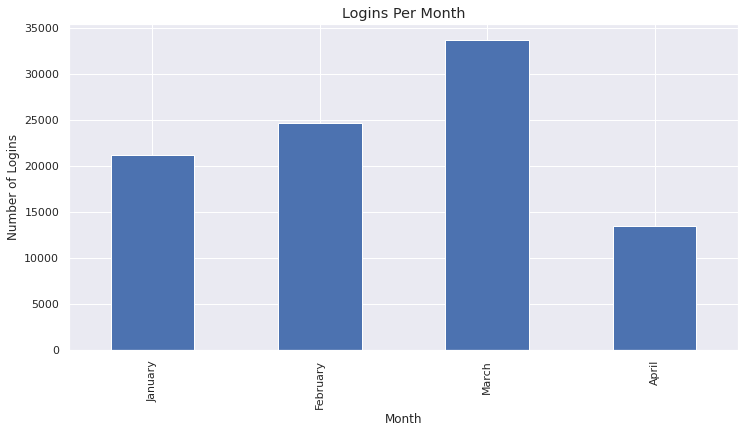

In [12]:
#Let's begin visualization at the highest level, month, and work our way down.
_ = sns.set()
_ = plt.figure(figsize=(12,6))
_ = logins.groupby('month')['count'].sum().plot(kind='bar')
_ = plt.title('Logins Per Month', size='large')
_ = plt.xticks(range(len(logins['month'].unique())), ['January', 'February', 'March', 'April'])
_ = plt.xlabel('Month')
_ = plt.ylabel('Number of Logins')

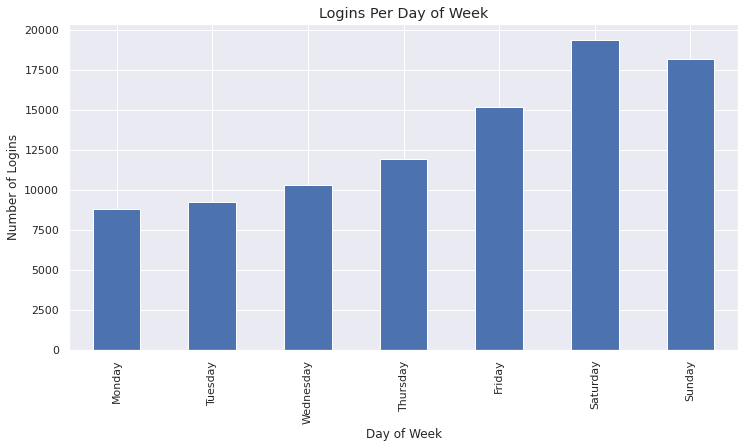

In [13]:
#Logins pe day of week.
_ = sns.set()
_ = plt.figure(figsize=(12,6))
_ = logins.groupby('day')['count'].sum().plot(kind='bar')
_ = plt.title('Logins Per Day of Week', size='large')
_ = plt.xticks(range(len(logins['day'].unique())), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
_ = plt.xlabel('Day of Week')
_ = plt.ylabel('Number of Logins')

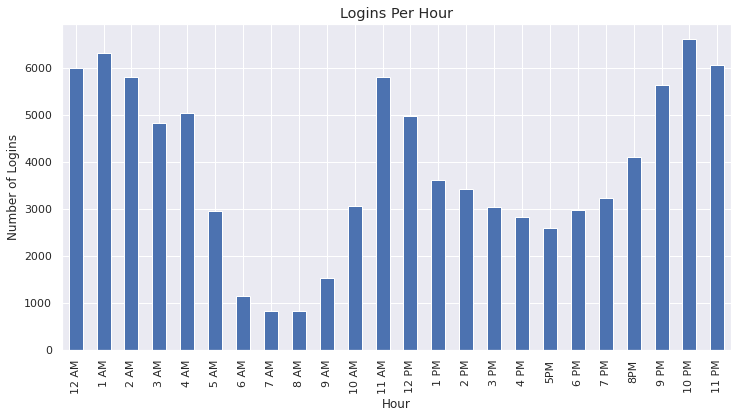

In [14]:
#Logins per hour.
_ = sns.set()
_ = plt.figure(figsize=(12,6))
_ = logins.groupby('hour')['count'].sum().plot(kind='bar')
_ = plt.title('Logins Per Hour', size='large')
_ = plt.xticks(range(len(logins['hour'].unique())), ['12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM',
                                                     '8 AM', '9 AM', '10 AM', '11 AM', '12 PM', '1 PM', '2 PM', '3 PM',
                                                     '4 PM', '5PM', '6 PM', '7 PM', '8PM', '9 PM', '10 PM', '11 PM'])
_ = plt.xlabel('Hour')
_ = plt.ylabel('Number of Logins')

# Part 2: Experiment and Metrics Design

## Context
*The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.*

## Question 1
*What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?*

## Response

The key measure of success is largely determined by Ultimate. Given the limited description, it sounds as if the issue is primarily limited to drivers accepting trips that cross the toll bridge.

In this instance, the metric should likely be percentage of cross-city trips accepted by the driver. I would suggest Ultimate calculate the metric for the current model, implement the change, and track the metric to look for an increase in the percentage of cross-city trips accepted by the drivers. A increased percentage of cross-city trips would indicate whether or not a driver is staying exclusive to one area.

## Question 2
*Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:*

*a. how you will implement the experiment;*

*b. what statistical test(s) you will conduct to verify the significance of the observation; and*

*c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.*

## Response

a.) This is a perfect scenario for A/B testing. In A/B testing, we compare two versions of product or service in order to determine which is more effective. In this case, we would split the Ultimate service into two groups; a treatment group and control group. The treatment group would be reimbursed for tolls on trips crossing the toll bridge, and the control group would not be reimbursed.

b.) After a specified time period, we can refer back to our chosen key metric. In this case, we'd compare percentage of cross-city trips between groups. If our treatment group saw an increase in percentage of cross-city trips taken and the control group did not, it's likely the toll reimbursement plan would have served its intended purpose. 

The traditionally sought method would be creating a null hypothesis stating toll reimbursement does not have an affect on encouraging driver partners to serve both cities, select a confidence interval (likely, 95%,) and either reject or refuse to reject the null hypothesis.

c.) It's worth noting there are some problems with confidence intervals, and we should not rely fully on the confidence interval to reject or refuse to reject the null hypothesis. Rather, I think it makes sense to address this from a machine learning perspective. 

A dataset should probably be designed to predict a target, y, on whether or not a driver would accept a cross-city ride. Features may include whether or not a the toll would be reimbursed, our key metric of "percentage of cross city rides accepted," surge charges, average distance, and more. 

We can then build a model to predict whether or not the driver would accept a specific cross-city ride. From this model, we can extract feature importances and get a much clearer understanding of what, specifically, contributes to drivers serving both cities. 

The incredible aspect of this machine learning approach is we do not assume what the key metric is. The model will help inform that, and likely reveal other metrics we may not have considered.

Based on this model, we can recommend actual insights to the city operations team.

# Part 3: Predictive Modeling

### 1. Load and Clean Data

In [15]:
#Create a path to the data.
path = '/content/drive/MyDrive/ultimate_challenge/ultimate_data_challenge.json'

In [16]:
#Read in the data.
users = pd.read_json(path)

In [17]:
#Explore the dataframe
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [18]:
users.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [19]:
#Let's first convert the date features to datetime.
users[['signup_date', 'last_trip_date']] = users[['signup_date', 'last_trip_date']].apply(pd.to_datetime, errors='coerce')

In [20]:
#We'll now deal with missing data, starting with the phone feature.

#First, see what OS are represented.
users.phone.unique()

#Let's recorded those missing values as 'NA' for 'Not applicable'
users['phone'].fillna('NA', inplace=True)

In [21]:
#Let's now address avg_rating_by_driver

#It makes sense to fill these missing values with the mean of the feature.
users['avg_rating_by_driver'].fillna(users['avg_rating_by_driver'].mean(), inplace=True)

In [22]:
#We are missing a bit more data for avg_rating_of_driver. Let's see what the mean looks like for this feature.
users['avg_rating_of_driver'].mean()

#This seems reasonable. Lets fill with the mean.
users['avg_rating_of_driver'].fillna(users['avg_rating_of_driver'].mean(), inplace=True)

In [23]:
#We'll view our changes at this point
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [24]:
users.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


### 2. Find Active Users

In [25]:
#Active users are defined as having taken a trip in the last 30 days. Let's find the most recent date in the dataset.
users['last_trip_date'].sort_values(ascending=False).head()

4486    2014-07-01
43047   2014-07-01
24059   2014-07-01
40290   2014-07-01
28689   2014-07-01
Name: last_trip_date, dtype: datetime64[ns]

In [26]:
#The dataset ends at July 1, 2014. An active user will have taken a trip anytime on, or after June 1, 2014.
users['active'] = users['last_trip_date'] >= '2014-06-01'

In [27]:
#Our feature to detect an active user appears to function correctly.
users.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


In [28]:
#37.6% of users are considered active. 62.4% of users are considered inactive.
value_counts = users['active'].value_counts()
print(value_counts/users['active'].count() * 100)

False    62.392
True     37.608
Name: active, dtype: float64


In [29]:
#Let's rename the columns to make the dataframe cleaner.
users.columns = ['city', 'trips_first_month', 'signup', 'driver_rating', 'avg_surge', 'last_trip', 'phone', 'surge_pct', 'black_user', 'weekday_pct', 'avg_dist', 'user_rating', 'active']


In [30]:
#The dataframe looks tidy and organized. Let's perform some EDA.
users.head()

,city,trips_first_month,signup,driver_rating,avg_surge,last_trip,phone,surge_pct,black_user,weekday_pct,avg_dist,user_rating,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


### 3. Exploratory Data Analysis

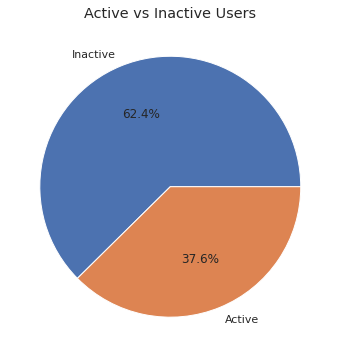

In [31]:
#Let's first visualize our active vs inactive users.
_ = sns.set
_ = plt.figure(figsize=(12,6))
_ = plt.pie(users['active'].value_counts(), labels=['Inactive', 'Active'], autopct='%1.1f%%')
_ = plt.title('Active vs Inactive Users', size='large')
_ = plt.show

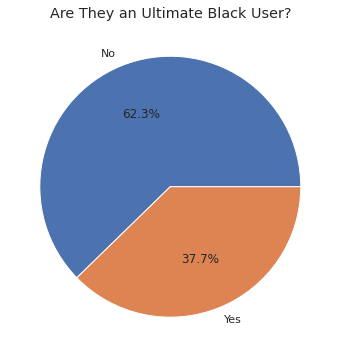

In [32]:
#We'll also see if a user was identified as a Black user.
_ = sns.set
_ = plt.figure(figsize=(12,6))
_ = plt.pie(users['black_user'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
_ = plt.title('Are They an Ultimate Black User?', size='large')
_ = plt.show

Interestingly, the percentage of Black users mirrors the percentage of active users.

<Figure size 864x432 with 0 Axes>

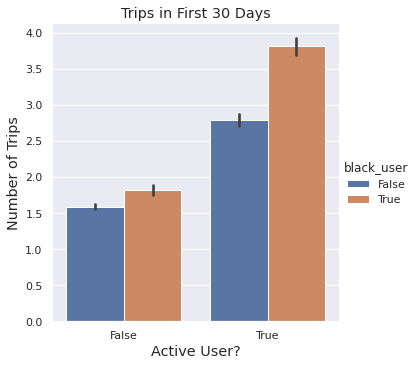

In [33]:
#What if they were a black user in their first 30 days?
_ = sns.set()
_ = plt.figure(figsize=(12,6))
_ = sns.catplot(x='active', y='trips_first_month', data=users, hue='black_user', kind='bar')
_ = plt.title('Trips in First 30 Days', size='large')
_ = plt.xlabel('Active User?', size='large')
_ = plt.ylabel('Number of Trips', size='large')

Active users took more trips in their first 30 days than inactive users, and Black users took more trips than regular users.

<Figure size 864x432 with 0 Axes>

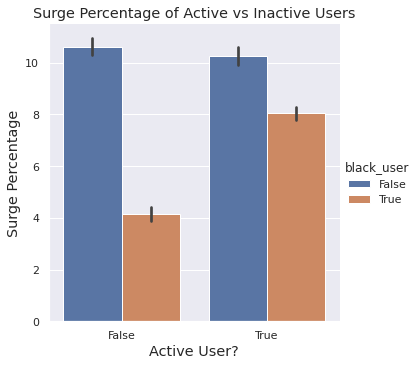

In [34]:
_ = sns.set()
_ = plt.figure(figsize=(12,6))
_ = sns.catplot(x='active', y='surge_pct', data=users, hue='black_user', kind='bar')
_ = plt.title('Surge Percentage of Active vs Inactive Users', size='large')
_ = plt.xlabel('Active User?', size='large')
_ = plt.ylabel('Surge Percentage', size='large')

Black users were less likely to take trips with surge pricing, particularly among inactive users. It seems like, more so than being a Black user, being an active user results in vastly different rider behavior. Let's explore that further.

<Figure size 864x432 with 0 Axes>

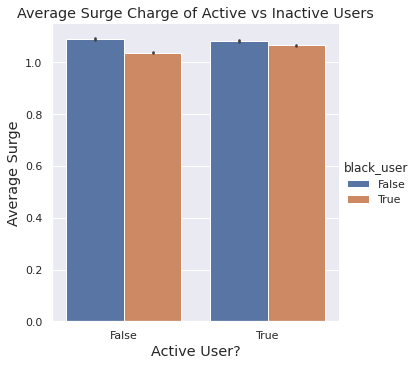

In [35]:
_ = sns.set()
_ = plt.figure(figsize=(12,6))
_ = sns.catplot(x='active', y='avg_surge', data=users, hue='black_user', kind='bar')
_ = plt.title('Average Surge Charge of Active vs Inactive Users', size='large')
_ = plt.xlabel('Active User?', size='large')
_ = plt.ylabel('Average Surge', size='large')

Interesting. The average surge between active and inactive users, whether black users or not, is roughly the same. The average surge charge does not differ much, but we've discovered the propensity to request and take a trip with a surge charge seems to be a distinguishing factor.

<Figure size 864x432 with 0 Axes>

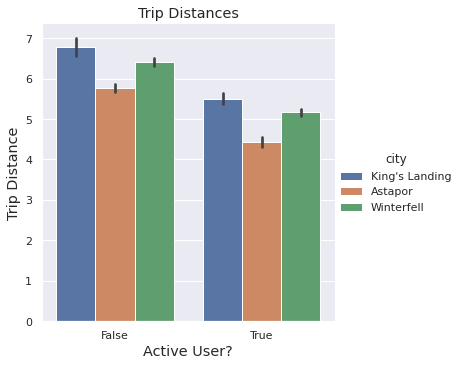

In [36]:
#Let see trip distance split between active and inactive users, colored by city.
_ = sns.set()
_ = plt.figure(figsize=(12,6))
_ = sns.catplot(x='active', y='avg_dist', data=users, hue='city', kind='bar')
_ = plt.title('Trip Distances', size='large')
_ = plt.xlabel('Active User?', size='large')
_ = plt.ylabel('Trip Distance', size='large')

Across all cities, active users took shorter trips on average.

### 4. Data Preprocessing

In [37]:
#Let's give our dataframe another look.
users.head()

,city,trips_first_month,signup,driver_rating,avg_surge,last_trip,phone,surge_pct,black_user,weekday_pct,avg_dist,user_rating,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


In [38]:
#We should first normalize our continuous variables and put the transformed data into a new dataframe.
df = users
scaler = MinMaxScaler()
df[['trips_first_month', 'driver_rating', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 'user_rating']] = scaler.fit_transform(df[['trips_first_month', 'driver_rating', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 'user_rating']])


In [39]:
#Next, we'll dummify categorical variables.
dummies = pd.get_dummies(users[['city', 'phone']])
df = pd.concat([users, dummies], axis = 1)

In [40]:
#Lastly, we'll cast our boolean values as 1s and 0s.
df[['black_user', 'active']] = df[['black_user', 'active']].astype(int)

In [41]:
#Finally, let's drop unneeded features.
df.drop(['city', 'signup', 'last_trip', 'phone'], axis=1, inplace=True)

In [42]:
#A quick inspection to ensure our data is ready to be modeled.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trips_first_month    50000 non-null  float64
 1   driver_rating        50000 non-null  float64
 2   avg_surge            50000 non-null  float64
 3   surge_pct            50000 non-null  float64
 4   black_user           50000 non-null  int64  
 5   weekday_pct          50000 non-null  float64
 6   avg_dist             50000 non-null  float64
 7   user_rating          50000 non-null  float64
 8   active               50000 non-null  int64  
 9   city_Astapor         50000 non-null  uint8  
 10  city_King's Landing  50000 non-null  uint8  
 11  city_Winterfell      50000 non-null  uint8  
 12  phone_Android        50000 non-null  uint8  
 13  phone_NA             50000 non-null  uint8  
 14  phone_iPhone         50000 non-null  uint8  
dtypes: float64(7), int64(2), uint8(6)
me

In [43]:
df.head()

,trips_first_month,driver_rating,avg_surge,surge_pct,black_user,weekday_pct,avg_dist,user_rating,active,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_NA,phone_iPhone
0,0.032,0.925,0.014286,0.154,1,0.462,0.022801,1.000,1,0,1,0,0,0,1
1,0.000,1.000,0.000000,0.000,0,0.500,0.051317,1.000,0,1,0,0,1,0,0
2,0.024,0.825,0.000000,0.000,0,1.000,0.004784,1.000,0,1,0,0,0,0,1
3,0.072,0.900,0.020000,0.200,1,0.800,0.014662,0.975,1,0,1,0,0,0,1
4,0.112,0.850,0.027143,0.118,0,0.824,0.019446,0.975,0,0,0,1,1,0,0


### 5. Modeling

For this binary classification problem, we'll use an ensemble learning method called Random Forest. Random Forests are typically quick to execute, take well to tuning, and are very interpretable. Other models we could explore, if needed, include Naive Bayes, Support Vector Machines, KNN, Extreme Gradient Boosting, or even Neural Networks.

In [44]:
#Let's define our predictors and target variable.
X = df.drop(['active'], axis=1)
y = df['active']

In [45]:
#Now, we'll split the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [46]:
#We'll try a reliable ensemble model for this problem - Random Forest
rf = RandomForestClassifier(random_state=42)

#Train the model
rf.fit(X_train, y_train)

#Predict on test data
y_pred = rf.predict(X_test)

### 6. Evaluate

In [47]:
#Let's see how our model did.
print(f'Training Accuracy: {rf.score(X_train, y_train)}')
print(f'Testing Accuracy: {rf.score(X_test, y_test)}')

Training Accuracy: 0.99665
Testing Accuracy: 0.7518


In [48]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      6219
           1       0.68      0.65      0.66      3781

    accuracy                           0.75     10000
   macro avg       0.74      0.73      0.73     10000
weighted avg       0.75      0.75      0.75     10000



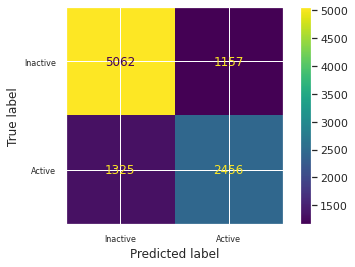

In [49]:
#Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels = rf.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['Inactive', 'Active'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['Inactive', 'Active'], fontsize = 8)
ax.set_yticklabels(labels = ['Inactive', 'Active'], fontsize = 8)
display_cm.plot(ax = ax)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


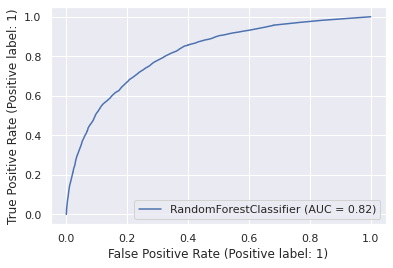

In [50]:
plot_roc_curve(rf, X_test, y_test)

14


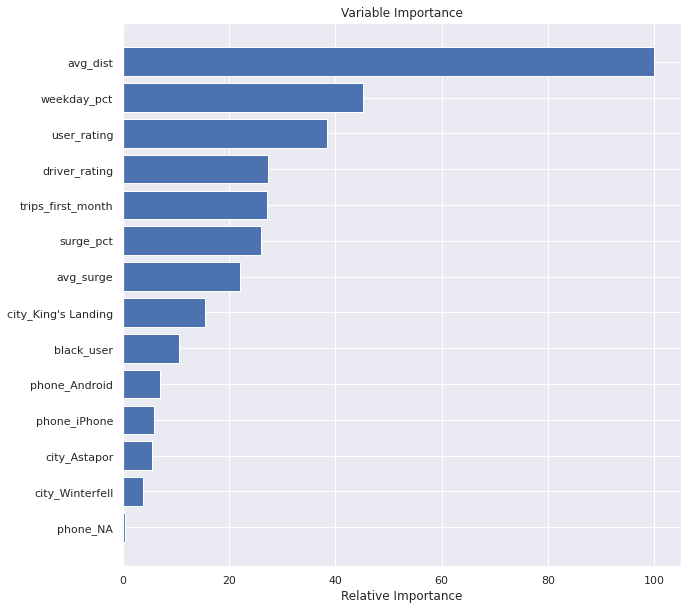

In [51]:
#Let's plot feature importance
feature_importance = rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:40]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### 7. Model Tuning

Our AUC of 0.82 is impressive, but this can be tuned for better performance.

In [56]:
params = {'n_estimators': [300, 500], 'max_depth': [15, 30], 'min_samples_split': [3, 5], 'min_samples_leaf': [5, 7]}

#As this is a classification problem, we will optimate for the AUC.
rf_clf = RandomForestClassifier(random_state=42)
rf_gs = GridSearchCV(rf_clf, params, cv=3, scoring='roc_auc', n_jobs=-1)

#Let's fit the grid
rf_gs.fit(X_train, y_train)

#Make our predictions
y_pred_gs = rf_gs.predict(X_test)

In [60]:
#Grab our best score
rf_gs.best_score_

0.8510681379334578

In [58]:
#Grab our best estimators
rf_gs.best_estimator_ 

RandomForestClassifier(max_depth=15, min_samples_leaf=7, min_samples_split=3,
                       n_estimators=500, random_state=42)

In [59]:
print("Classification Report")
print(classification_report(y_test, y_pred_gs))

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      6219
           1       0.74      0.66      0.70      3781

    accuracy                           0.78     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.78      0.78      0.78     10000



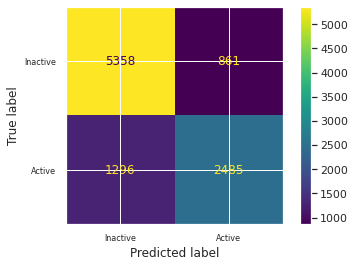

In [61]:
#Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_gs, labels = rf_gs.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['Inactive', 'Active'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['Inactive', 'Active'], fontsize = 8)
ax.set_yticklabels(labels = ['Inactive', 'Active'], fontsize = 8)
display_cm.plot(ax = ax)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


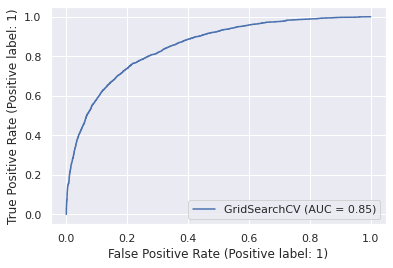

In [64]:
plot_roc_curve(rf_gs, X_test, y_test)

We've managed to boost the AUC to 0.85

14


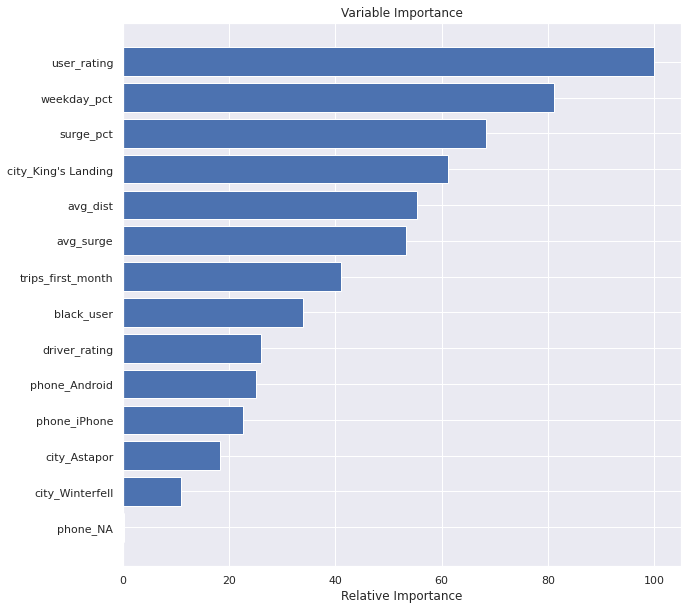

In [66]:
#Let's plot feature importance
feature_importance = rf_gs.best_estimator_.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:40]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### 8. Conclusions

Our tuned random forest model shows different feature importances than our untuned model. From this model, we can make recommendations to Ultimate to improve its ability to keep riders active.

1.) Active users seem to be rated well by drivers, and the amount of weekday rides they take seems to be a factor that should be investigated further. It's possible weekday riders are using the service as transportation to and from work.

2.) The frequency of surge increases seems to heavily influence ridership. This should also be investigated further. Perhaps riders in certain cities are experiencing more rides with a surge charge, dissuading ridership. We know toll fees were being absorbed by drivers, and perhaps this is reflected in the surge charge for a city that is out of the way?

3.) Whether or not a rider is coming from King's Landing seems to have significant influence on whether or not that rider remains active or not. This, too, is worth investigating further. Is it possible King's Landing is isolated from the other two cities in our dataset? Perhaps users in King's Landing experience longer trips and therefore, higher and more frequent surge charges?

4.) Finally, trips in the first month and whether or not a user is a Black Ultimate member seems to play a part in rider retention.

In conclusion, we can't make a concrete recommendation based on this data alone. However, there are some questions worth digging into more deeply. 

If I were to make a recommendation based on this model, it would be two-fold. First, an incentive program to encourage weekday ridership if the rider is a highly rated passenger. Ultimate may be able to create more active users if customers see a need for the service beyond a weekend taxi service. We know being an Ultimate Black member has some importance to our model, so perhaps this feature could be rolled into the Black service.

Another recommendation is likely involve reduing the surge charge for those traveling to and from King's Landing. By reimbursing toll fees and spreading out costs associated with surge pricing across Astapor and Winterfell, Ultimate may be better able to expand and retain ridership.